In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df = df.sort_values('ts').ffill().dropna()
df['ts'] = pd.to_datetime(df['ts'],unit='s')
df['date'] = df.ts.dt.date

In [4]:
df['ratio'] = df['BTC/USD'] / df['ETH/USD']
df['diff'] = df['ratio'] / df['ratio'].iloc[0] - 1

In [5]:
last = df.groupby(df['date'])['ratio'].last().reset_index()
last['date'] = last['date'] + pd.Timedelta(days=1)
df = df.merge(last, on='date', how='left')

<Axes: xlabel='ts'>

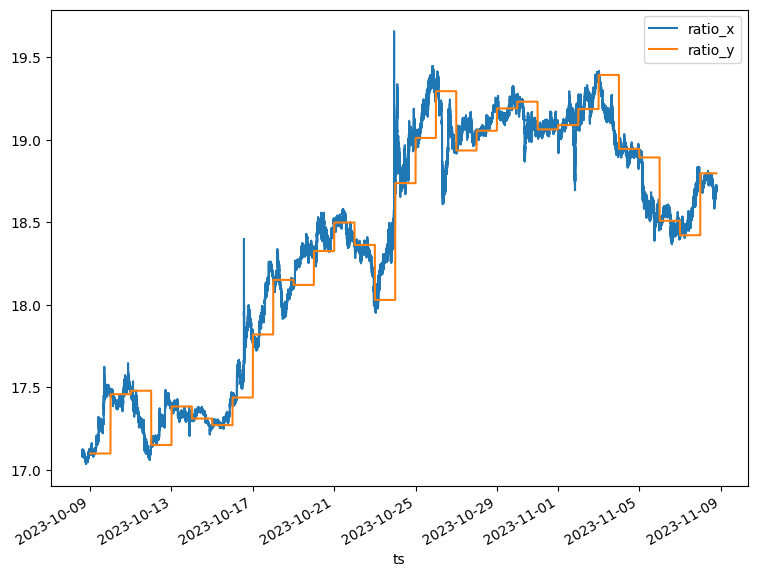

In [6]:
df.plot(x="ts", y=['ratio_x','ratio_y'], kind="line", figsize=(9, 7))

In [ ]:
df.ratio_x.plot()